In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from itertools import combinations
from itertools import product
from scipy.stats import chi2_contingency

In [21]:
data = pd.read_csv("Employees.csv")
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [3]:
#Lets check for duplicates 
data.duplicated().sum()

0

In [4]:
#lets remove the duplicates 
data.drop_duplicates(inplace=True) #inplace=True modifies the original dataframe

In [5]:
#Lets check for null/nan/missing values in the data 
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [6]:
data.shape

(54808, 13)

In [7]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [9]:
data.describe() # prints the statistics of the numerical columns in the data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## 
UNIVARIATE Analysis

In [10]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

## Numerical Columns Analysis
1]no_of_trainingss

In [12]:
data["no_of_trainings"].value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

<Axes: xlabel='no_of_trainings', ylabel='Count'>

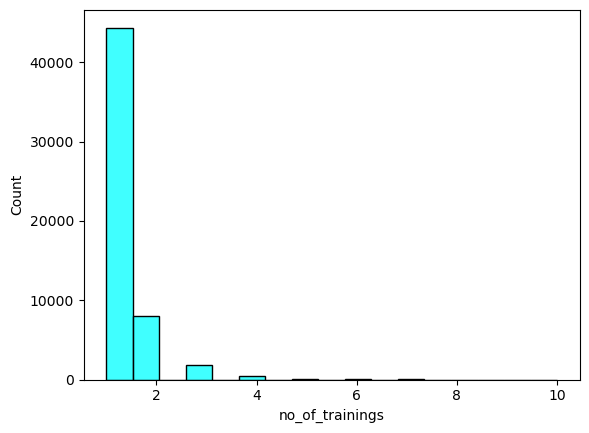

In [13]:
# it has numeric datatype but has only 9 unique values so can be treated as categorical column
sns.histplot(data=data,x="no_of_trainings",color="cyan")

## We can see discrete bars due to the fact that no_of_trainings has only 9 discrete unique values

Inference : Most of the employee have only 1 or 2 training session with a maximum of 9

2] AGE

<Axes: xlabel='age', ylabel='Count'>

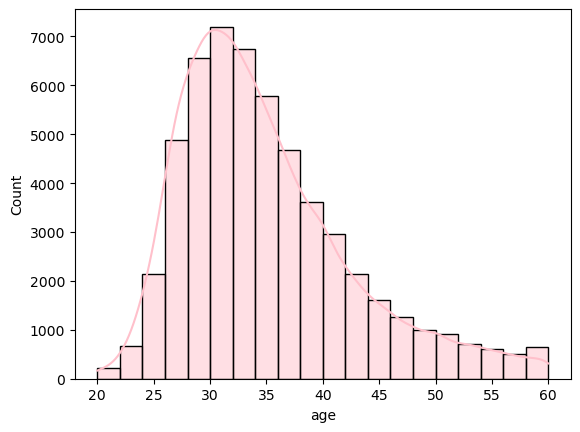

In [15]:
sns.histplot(data=data,x="age",bins=20,color="pink",kde=True)

## We can see that most of the employees are youth, with few being aged.
We have a peak around 30 years age which is quite logical in most of the companies to have young employees with a little work experience

3] length_of_service

<Axes: xlabel='length_of_service', ylabel='Count'>

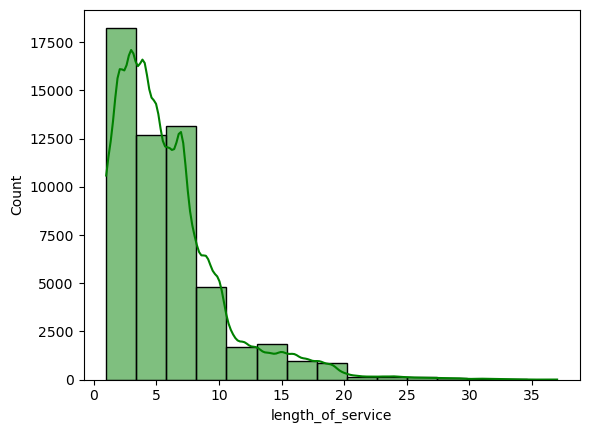

In [16]:
sns.histplot(data=data,x="length_of_service",bins=15,color="green",kde=True)

## We can see that most of the employees are dont have very less large length_of_service with their previous employer as the kde is highly right skewed

4 is_promoted80

In [17]:
data.is_promoted.unique()

array([0, 1], dtype=int64)

C:\Users\Laksh Dobariya\AppData\Local\Temp\ipykernel_21860\2062738193.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="is_promoted",palette=["red","green"])


<Axes: xlabel='is_promoted', ylabel='count'>

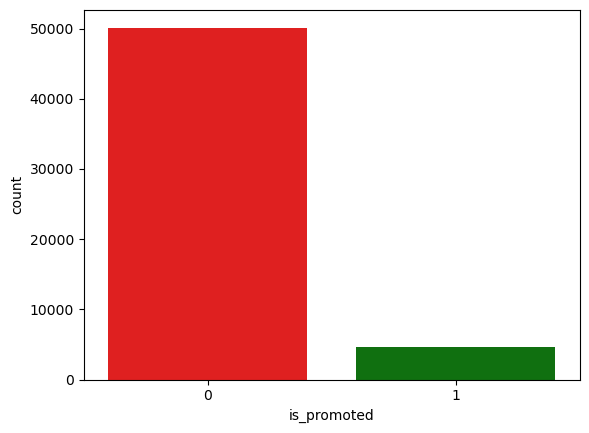

In [18]:
sns.countplot(data=data,x="is_promoted",palette=["red","green"])

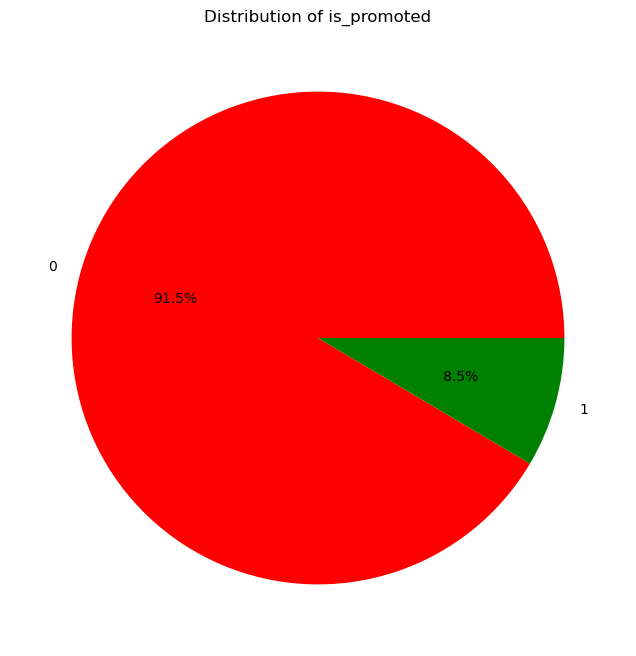

In [19]:
counts = data["is_promoted"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('Distribution of is_promoted')
plt.show()

## We can see that 91.5% of the employees havent achieved Key Performance Indicators which is a concern for the company managers.
They have to work on improving this %age upto 70% and even more for growth of the company
5] AWARDS WONWON

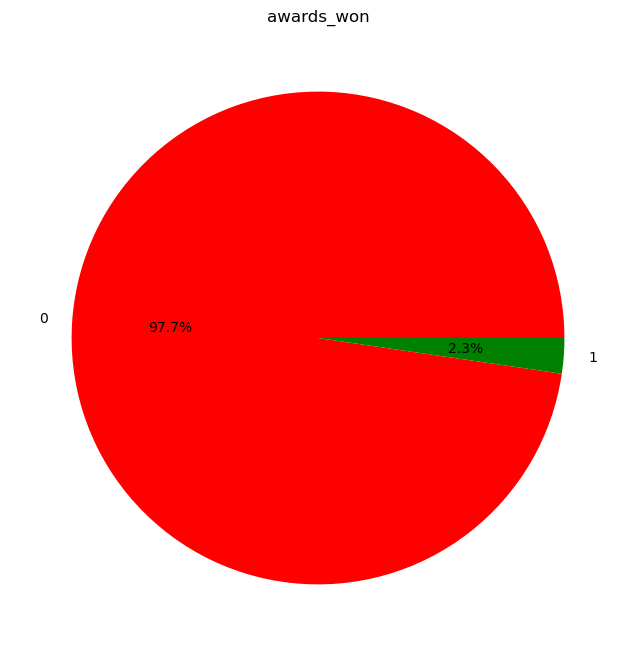

In [20]:
counts = data["awards_won"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('awards_won')
plt.show()

## Only 2.3% of the employees have won the award which is quite logical that award is given by the company to only few cream employees for there excelent performance

6] avg_training_score

<Axes: xlabel='avg_training_score', ylabel='Count'>

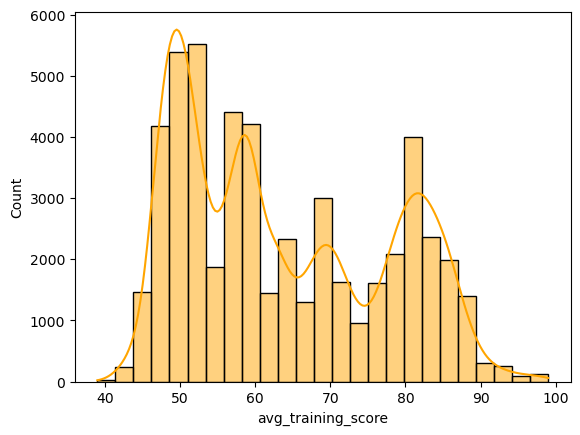

In [22]:
sns.histplot(data=data,x="avg_training_score",bins=25,kde=True,color="orange")

## We can see a wide variation in the avg_training_score range. Less employees have scored above 80

7] previous_year_rating

<Axes: xlabel='previous_year_rating', ylabel='count'>

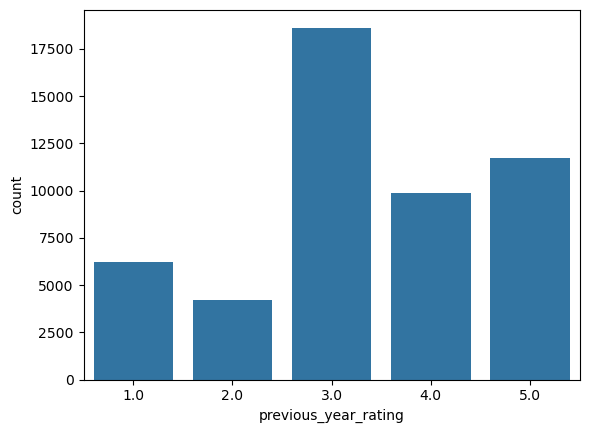

In [23]:
sns.countplot(data=data,x="previous_year_rating")

## Categorical Column Analysis

In [24]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

1] Department

In [25]:
data.department.value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='department'>

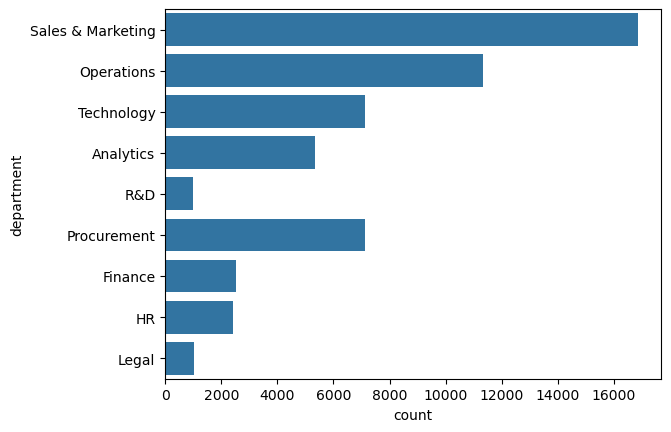

In [26]:
sns.countplot(data=data,y="department")

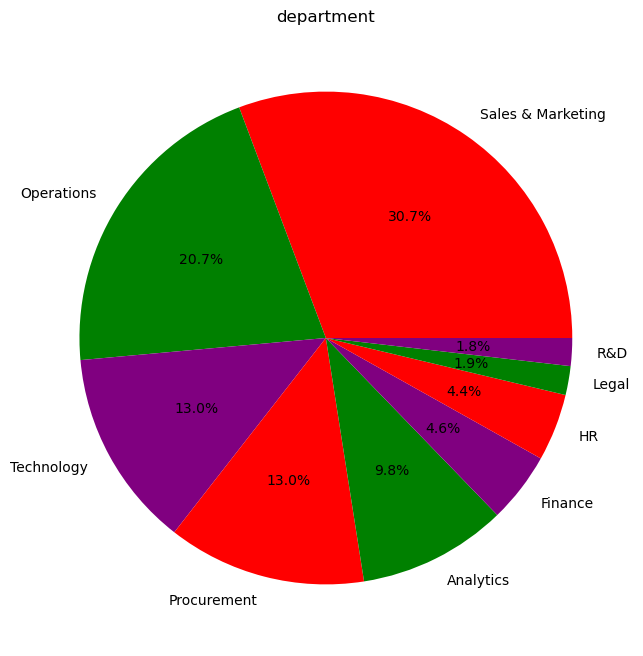

In [27]:
counts = data["department"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green","purple"])
plt.title('department')
plt.show()

## Operations and Sales&Marketing covers half of company employees with very few in R&D, Legal, Finance etc

2] Education

<Axes: xlabel='education', ylabel='count'>

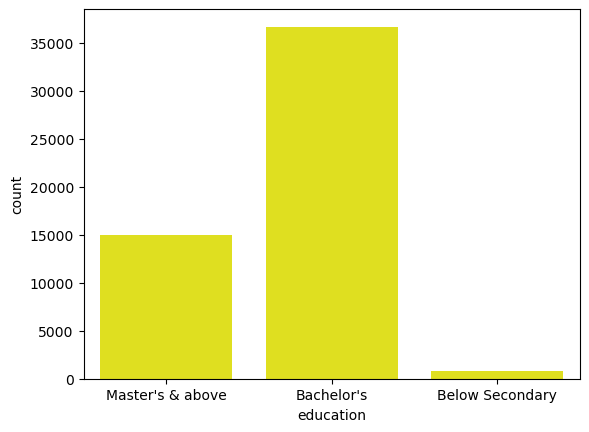

In [28]:
sns.countplot(data=data,x="education",color="yellow")

## Max employees are decently educated, few being highly educated, very less being less educated

3] Gender

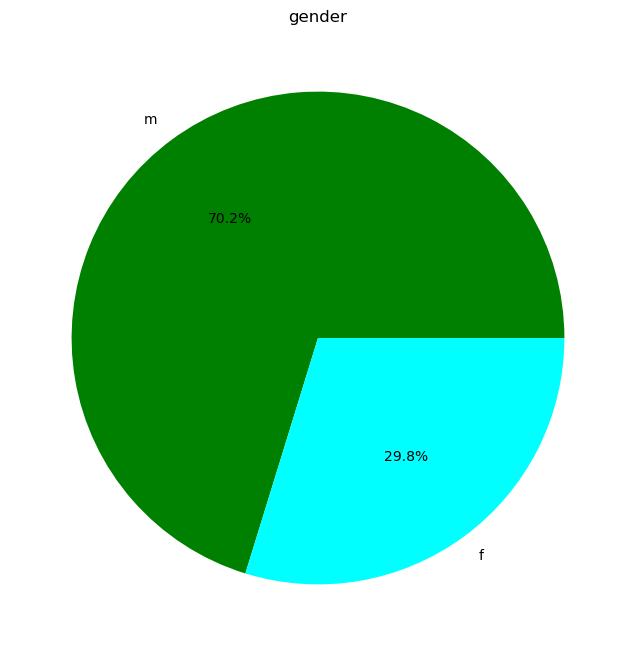

In [29]:
counts = data["gender"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["green", "cyan"])
plt.title('gender')
plt.show()

## More than 70% employees in the company are male

4] recruitment_channel

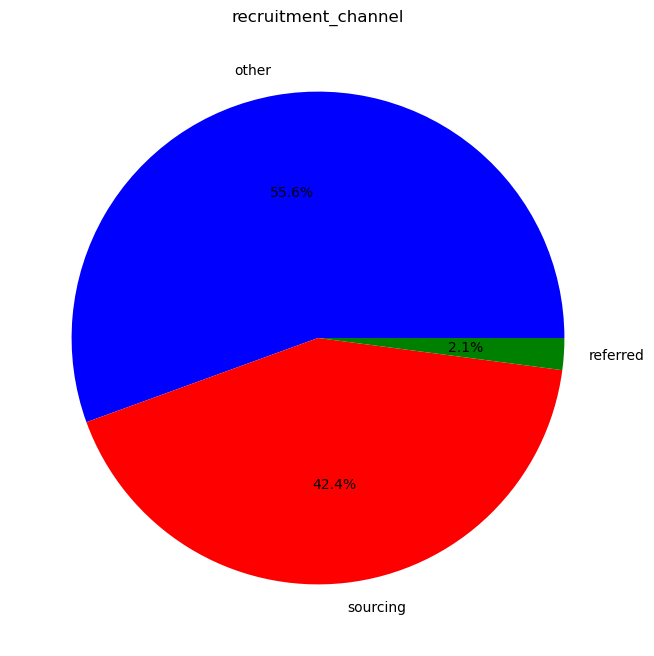

In [30]:
counts = data["recruitment_channel"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["blue", "red","green"])
plt.title('recruitment_channel')
plt.show()

## 5] Region

<Axes: xlabel='count', ylabel='region'>

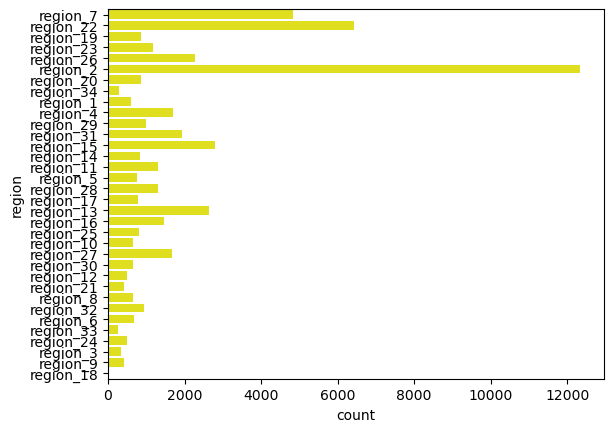

In [31]:
sns.countplot(data=data,y="region",color="yellow")


## Max employees belong to region2, while remaining approx evenly spread in rest locations

Here we have completed analysis of indivisual column, based on this lets fill the null values in the dataset
Based on the analysis of previous_year_rating, i think its better to fill nan values using meadian (which is also the mode)

In [32]:
si1 = SimpleImputer(strategy="median")
imputed_values = si1.fit_transform(data[["previous_year_rating"]])
# Assign the imputed values back to the original DataFrame
data["previous_year_rating"] = imputed_values

## For the education column lets use the mode (graduate) as its categorical data mean, meadin doesnt make sense and also graduate class is largely dominant over the other two

In [33]:
# Lets use fillna this time
mode = data['education'].mode()[0]
data['education'] = data['education'].fillna(mode)

In [34]:

data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

## Now we have a completed the missing value imputation part
BIVARIATE ANALYSIS
1] Numerical and Numerical

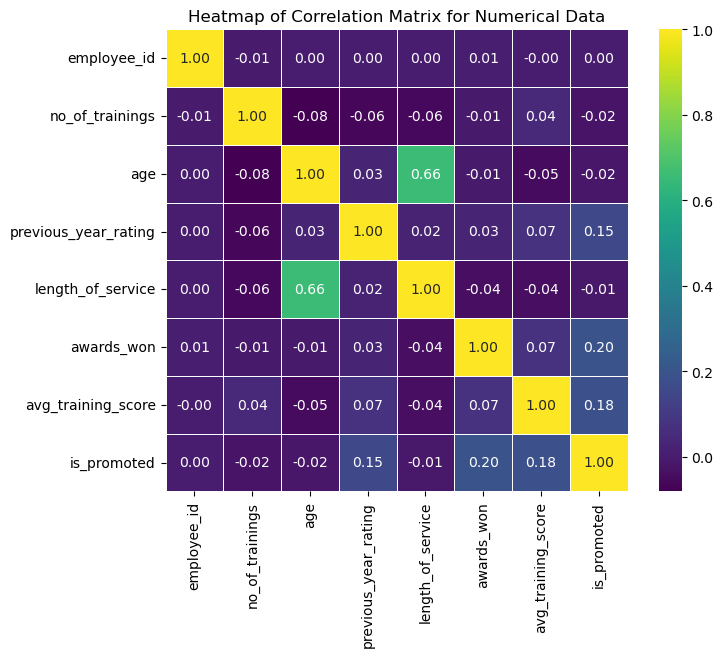

In [35]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

## From the heatmap of correlation matrix we can see that ther isnt much linear relationship between the maximum numerical columns

Two things that can be infered are
1] length of service is quite well correlated with age which is quite logical as person with less age cant be expected to have large experience.
2] KPI more than 80 is little related with the prev_yr_rating.

2] Categorical and categorical

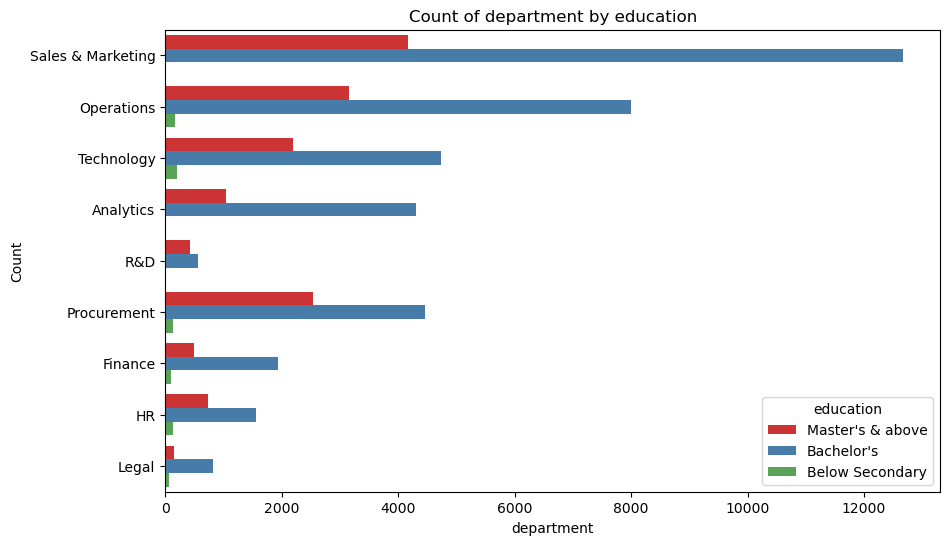

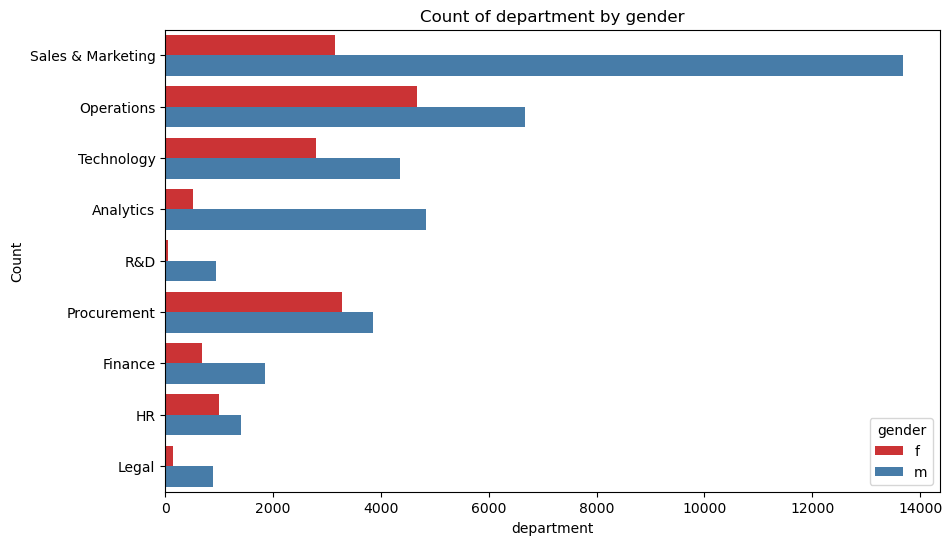

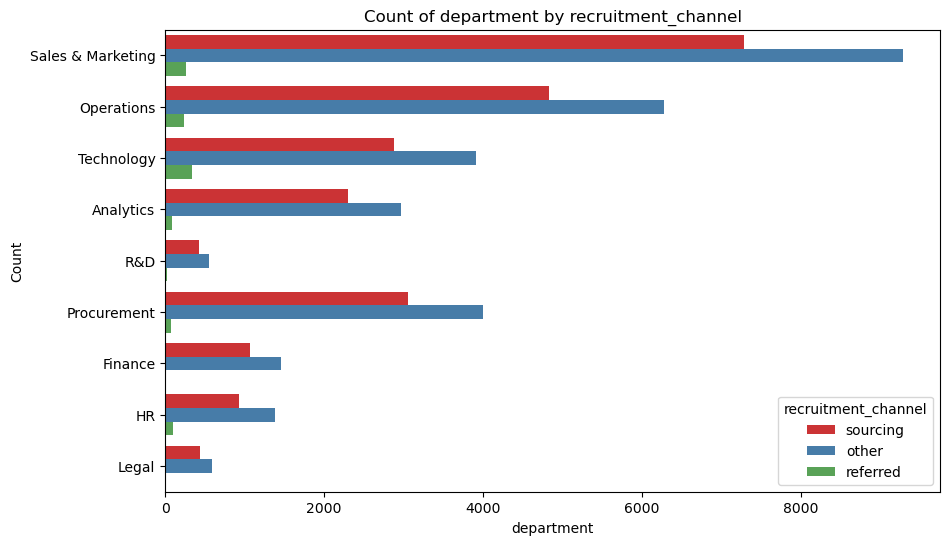

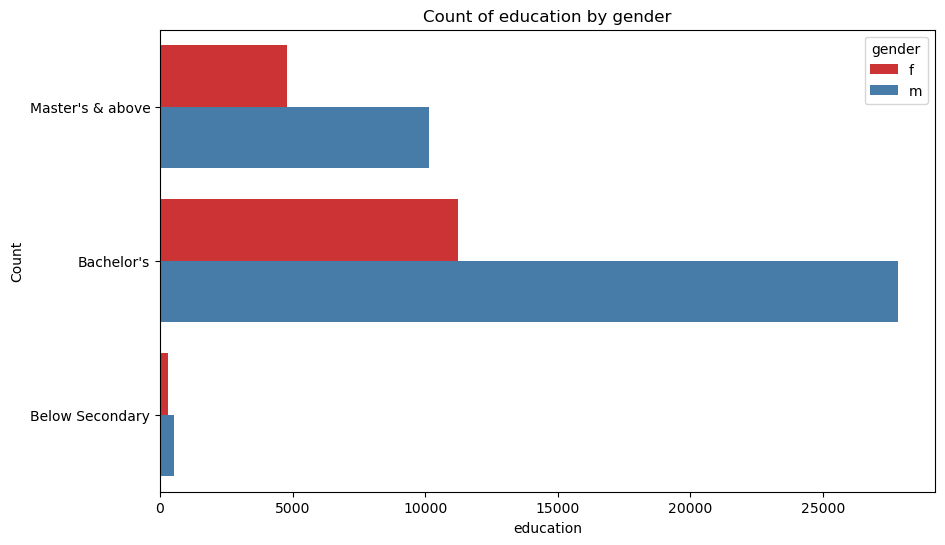

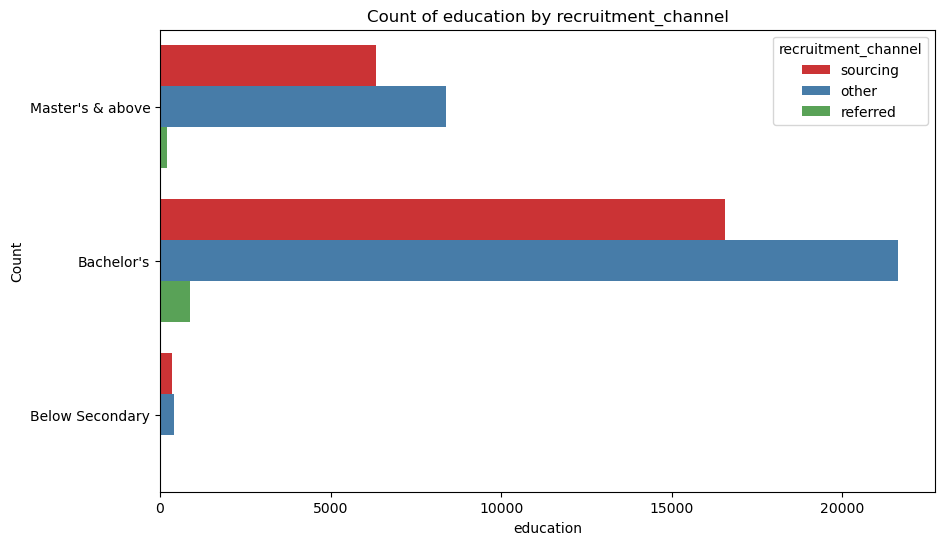

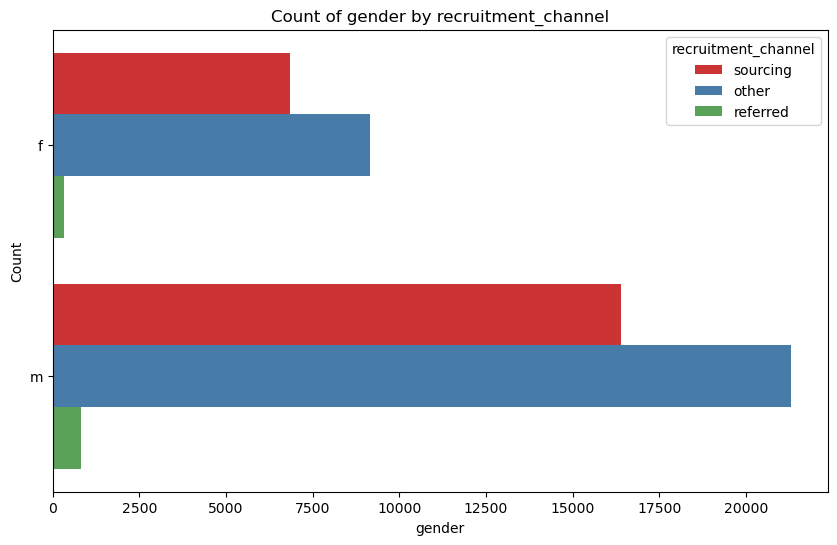

In [36]:
# lets not plot for region as its giving very dirty graphs which cant be used to infer anything
cat_col = cat_cols.copy()
cat_col.remove("region")
for col1, col2 in combinations(cat_col, 2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=col1, hue=col2, palette='Set1')
    plt.title(f'Count of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.legend(title=col2)
    plt.show()

## We have plotted count plots for various combinations of categorical columns

In [37]:
for col1, col2 in combinations(cat_cols, 2):
    # Create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")

Chi-Square Test between department and region:
Chi2 Statistic: 7894.0223, p-value: 0.0000, Degrees of Freedom: 264
Chi-Square Test between department and education:
Chi2 Statistic: 1818.1017, p-value: 0.0000, Degrees of Freedom: 16
Chi-Square Test between department and gender:
Chi2 Statistic: 4503.0130, p-value: 0.0000, Degrees of Freedom: 8
Chi-Square Test between department and recruitment_channel:
Chi2 Statistic: 440.1133, p-value: 0.0000, Degrees of Freedom: 16
Chi-Square Test between region and education:
Chi2 Statistic: 3437.7071, p-value: 0.0000, Degrees of Freedom: 66
Chi-Square Test between region and gender:
Chi2 Statistic: 1462.0421, p-value: 0.0000, Degrees of Freedom: 33
Chi-Square Test between region and recruitment_channel:
Chi2 Statistic: 1403.8684, p-value: 0.0000, Degrees of Freedom: 66
Chi-Square Test between education and gender:
Chi2 Statistic: 68.8829, p-value: 0.0000, Degrees of Freedom: 2
Chi-Square Test between education and recruitment_channel:
Chi2 Statistic

## high p-value implies there is no association between the two categorical data¶

So from the above result we can say the following things: 1] department and region, department and education, department and gender, department and recruitment_channel have a relationship between them ie. department is dependent on all these factors 2] region is also dependent on all other cat factors education, gender, department, recruitment_channel 3] only indepedent pair from the observation is gender and recruitment channel

3] Numerical and Categoricalel

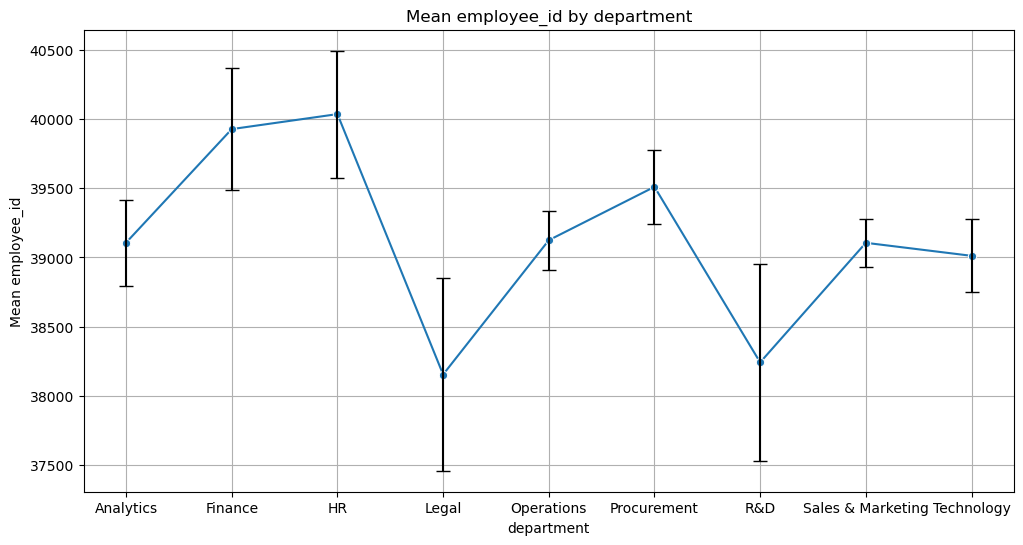

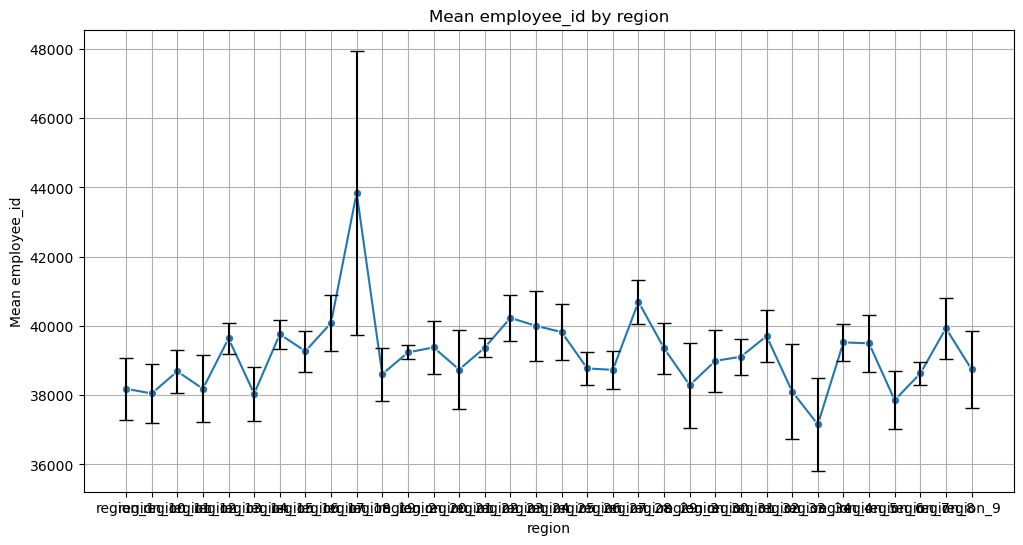

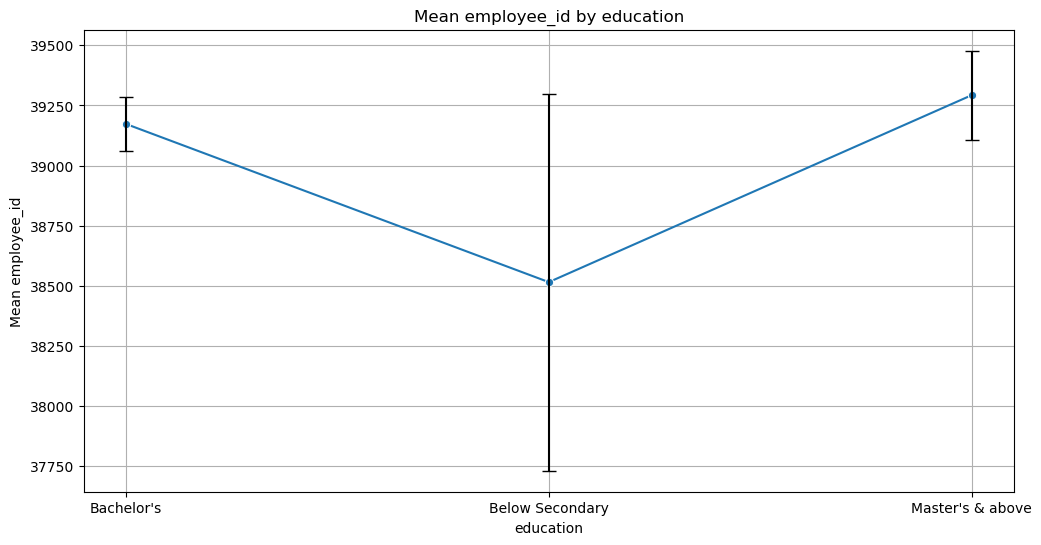

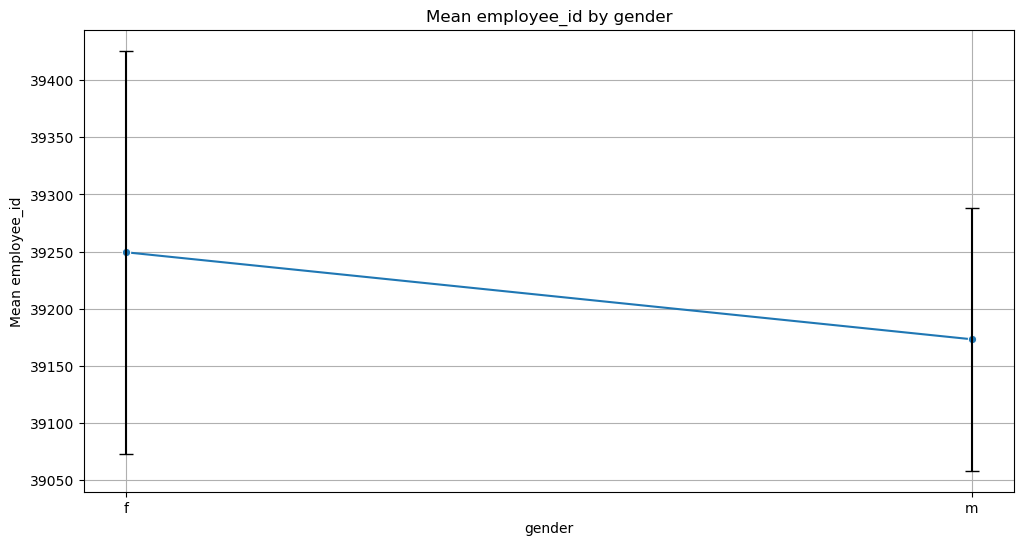

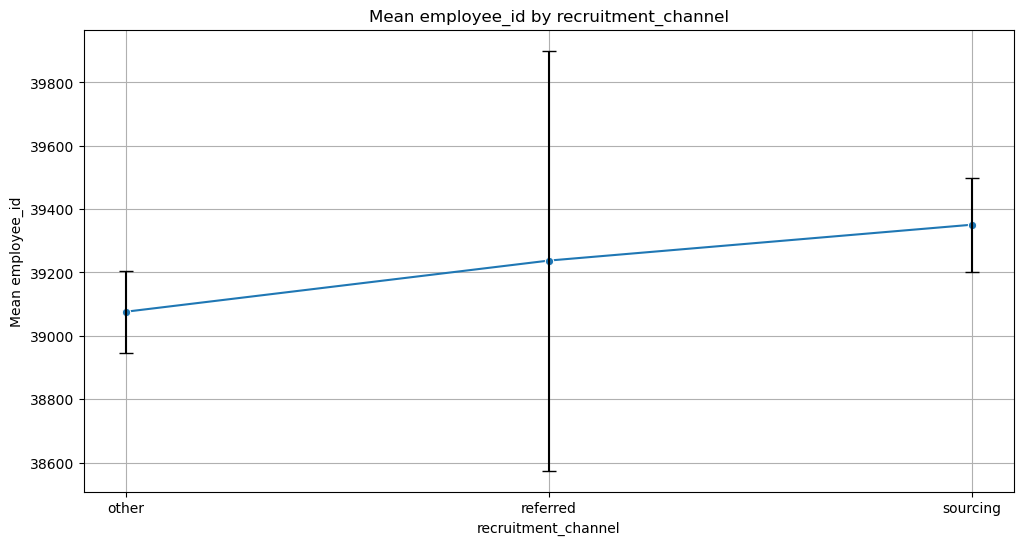

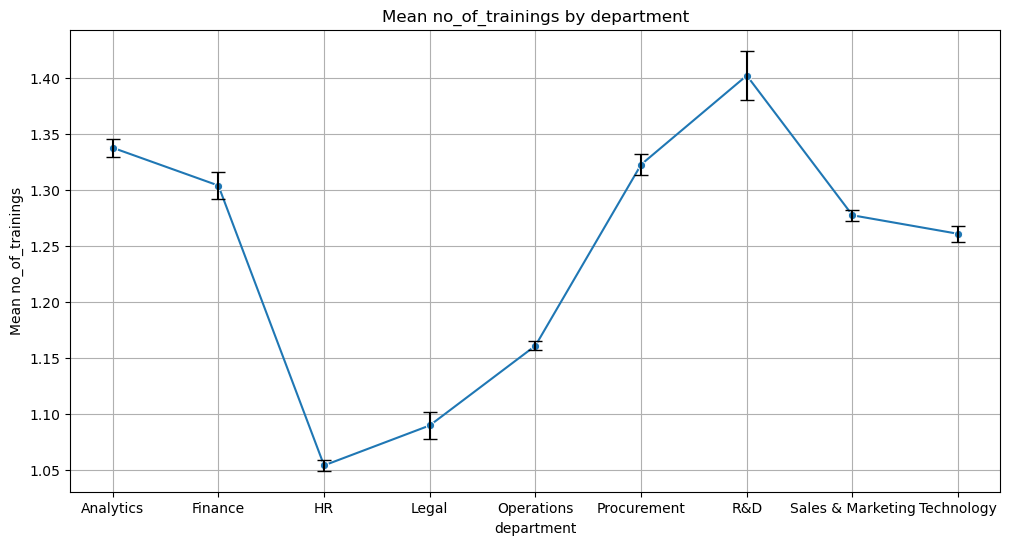

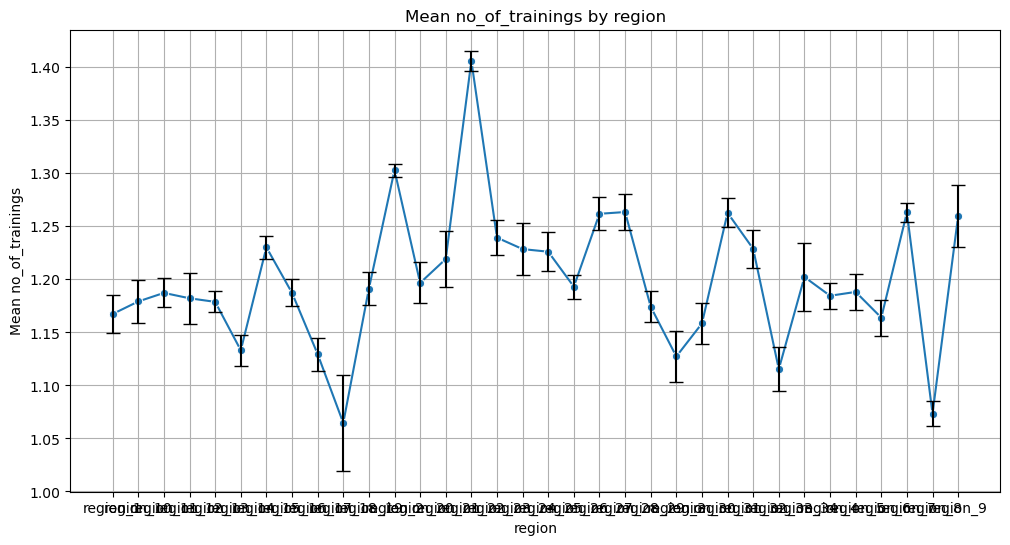

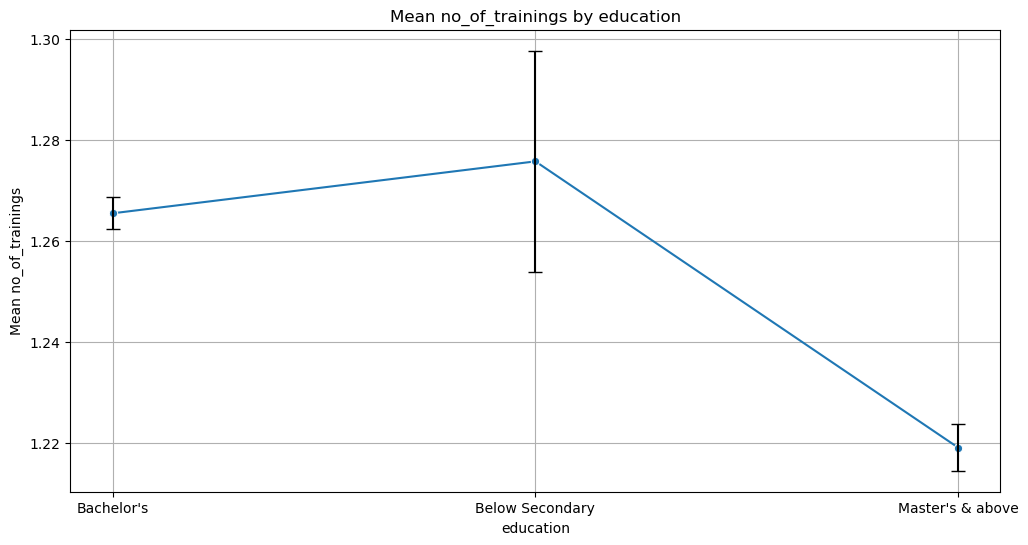

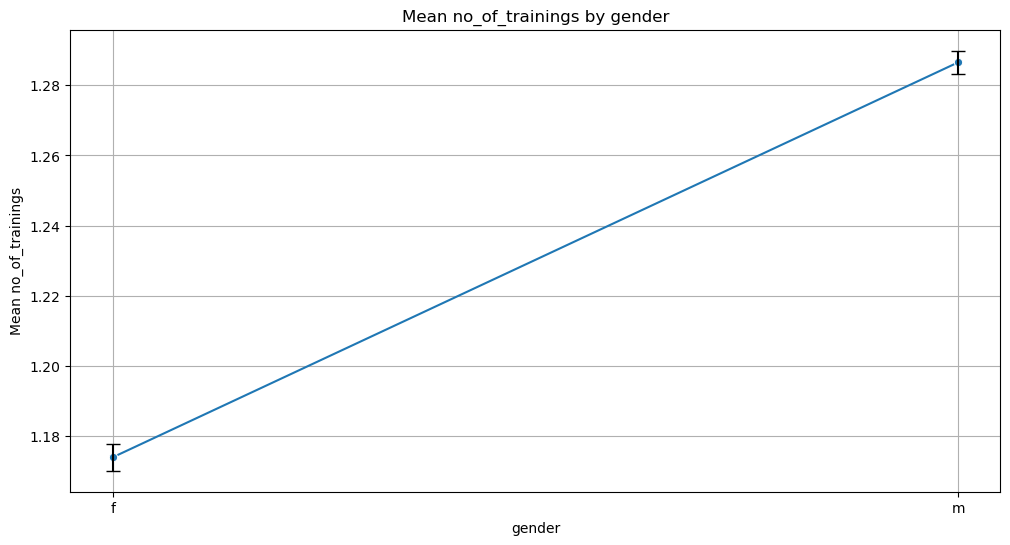

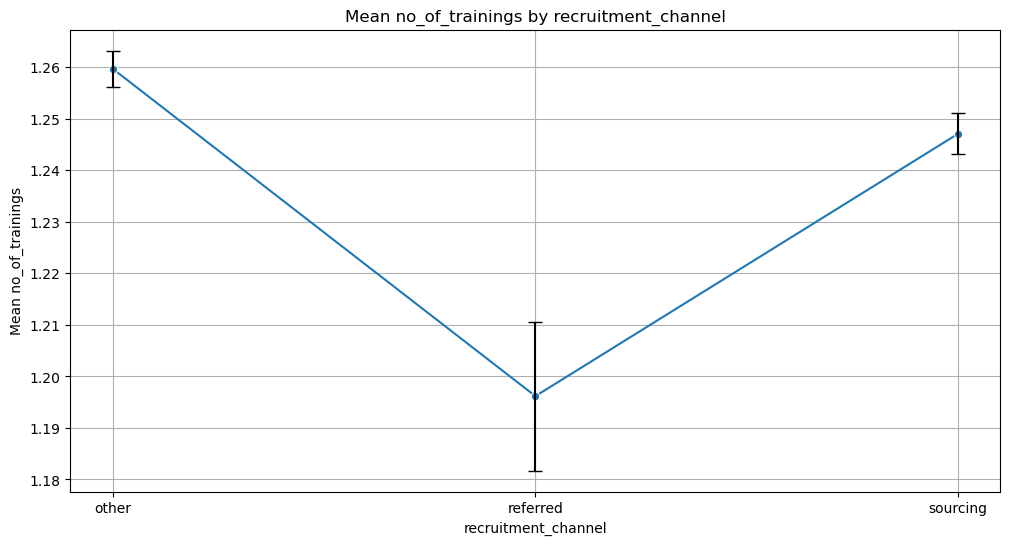

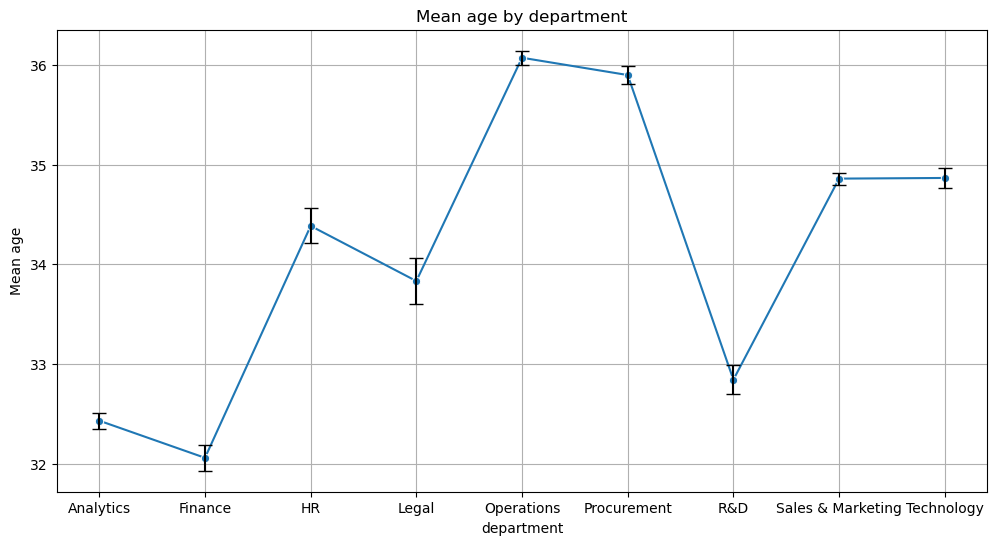

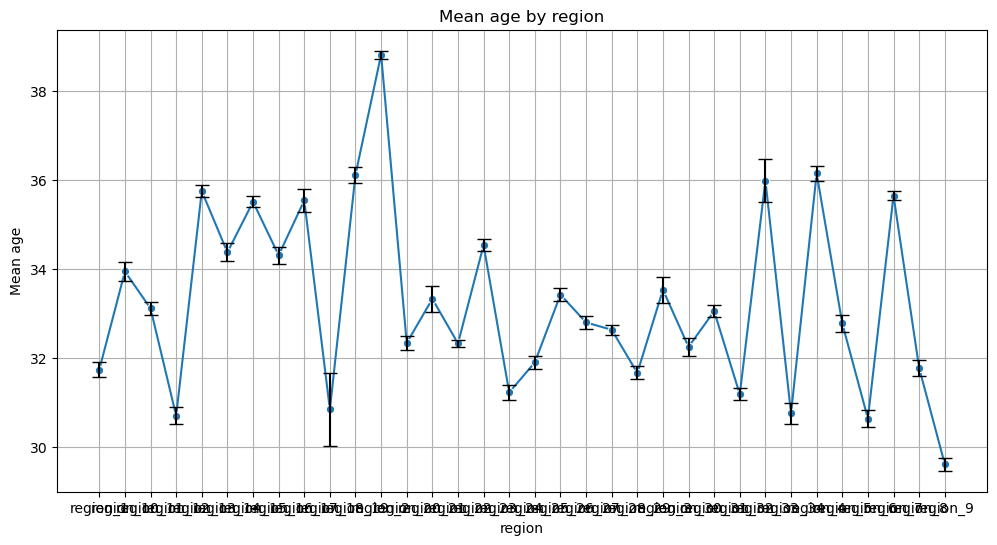

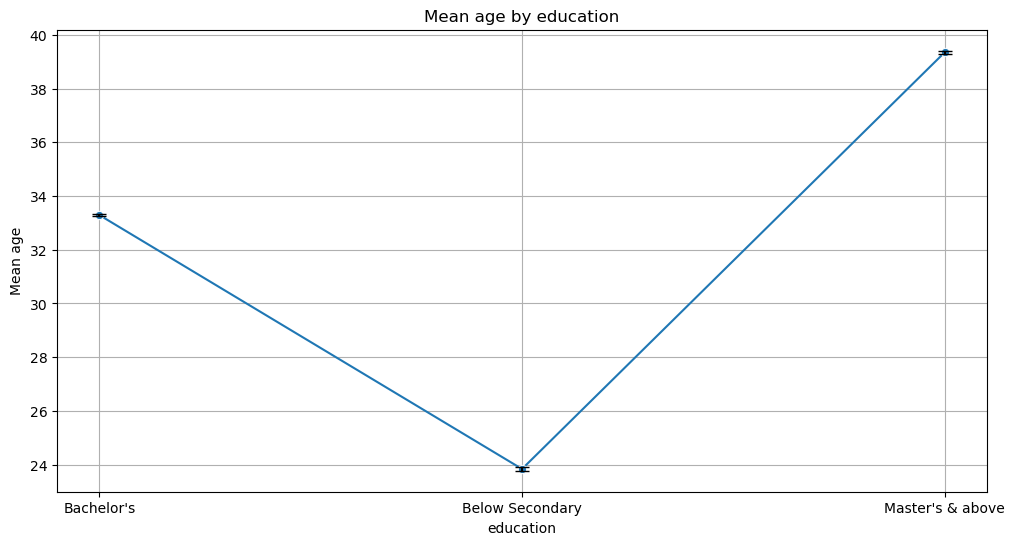

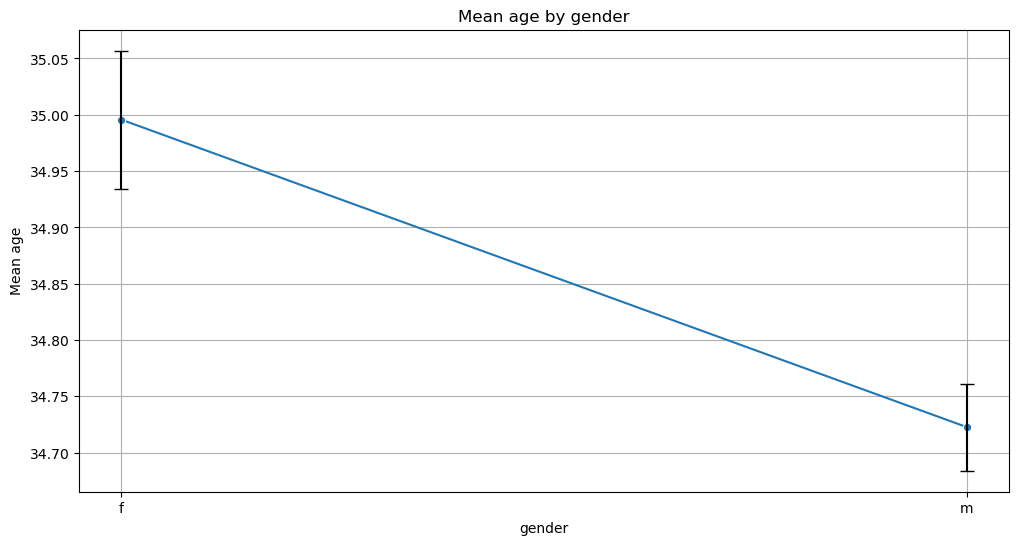

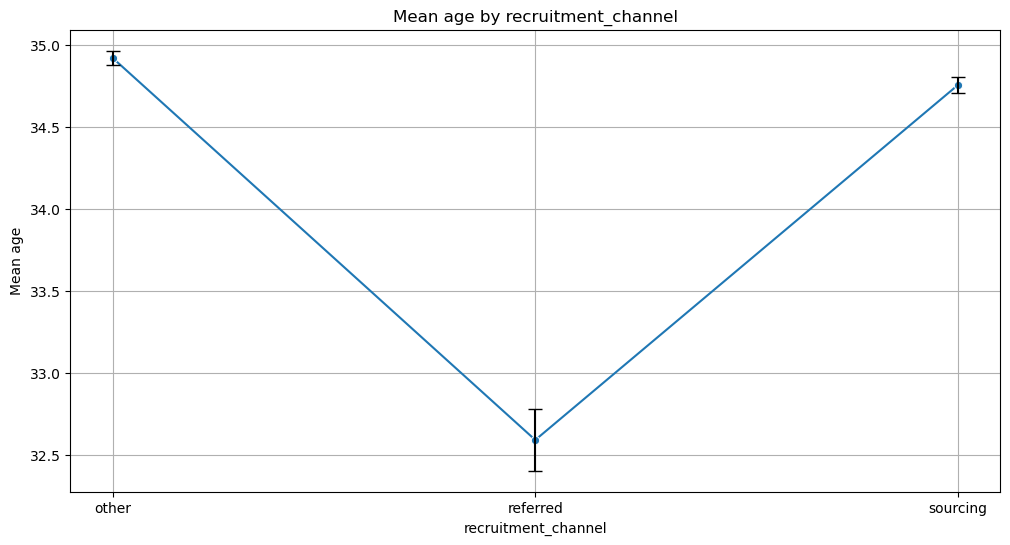

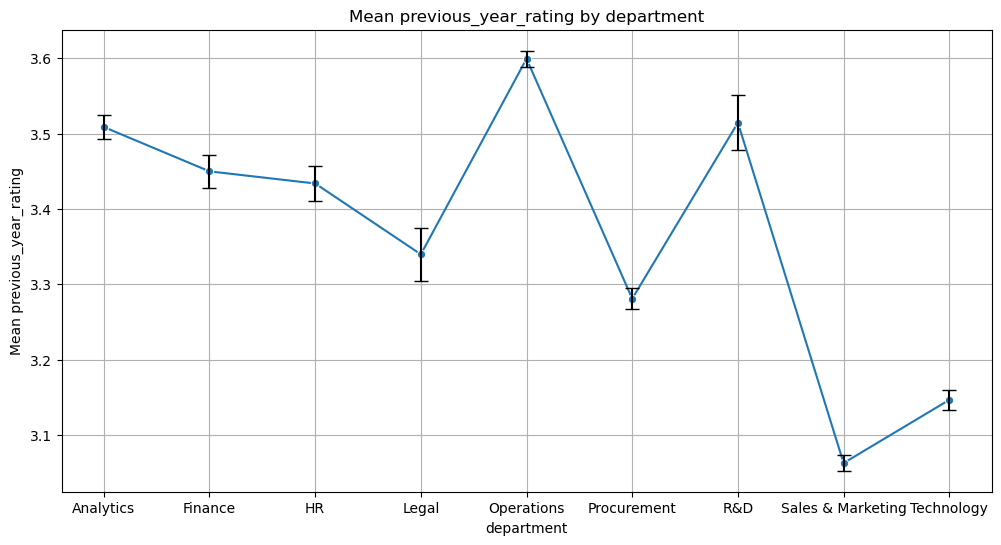

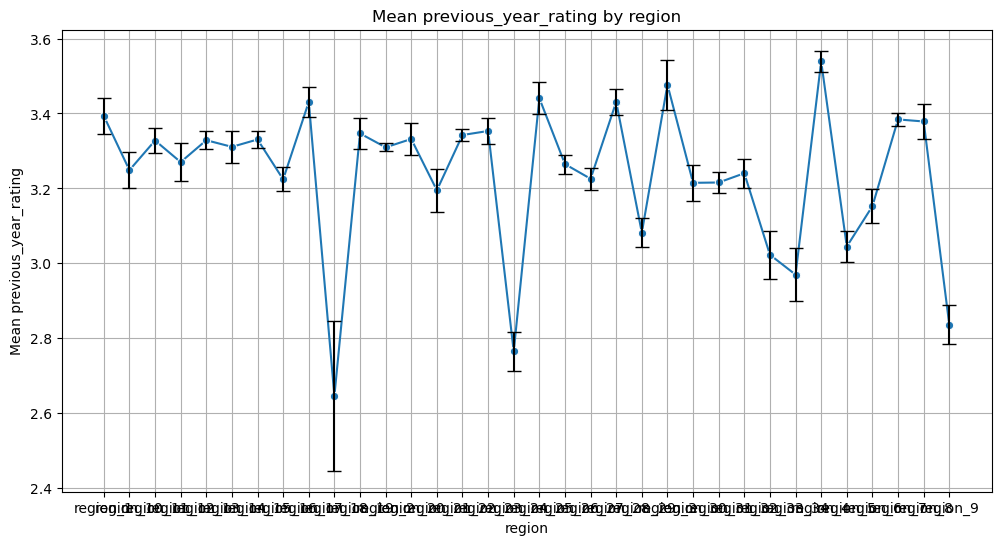

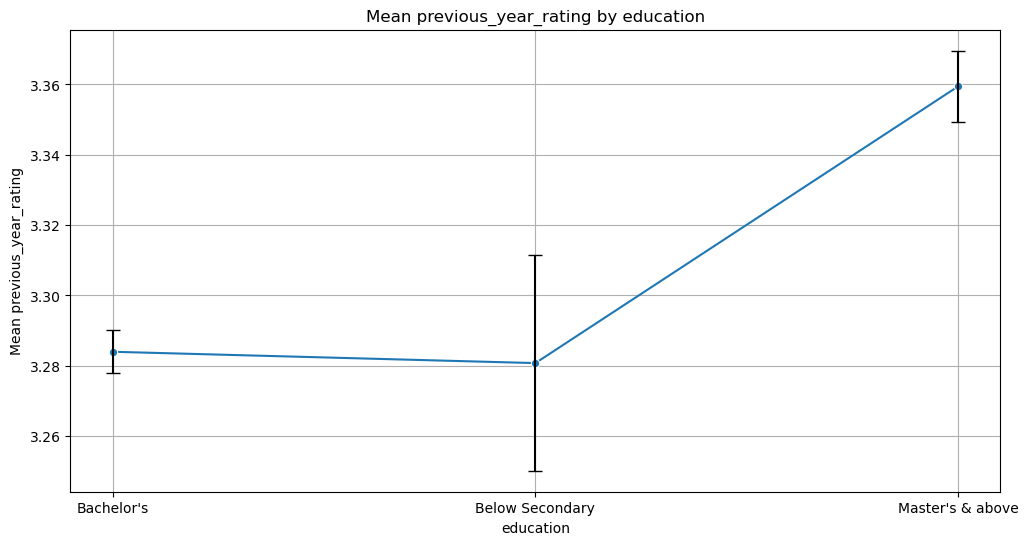

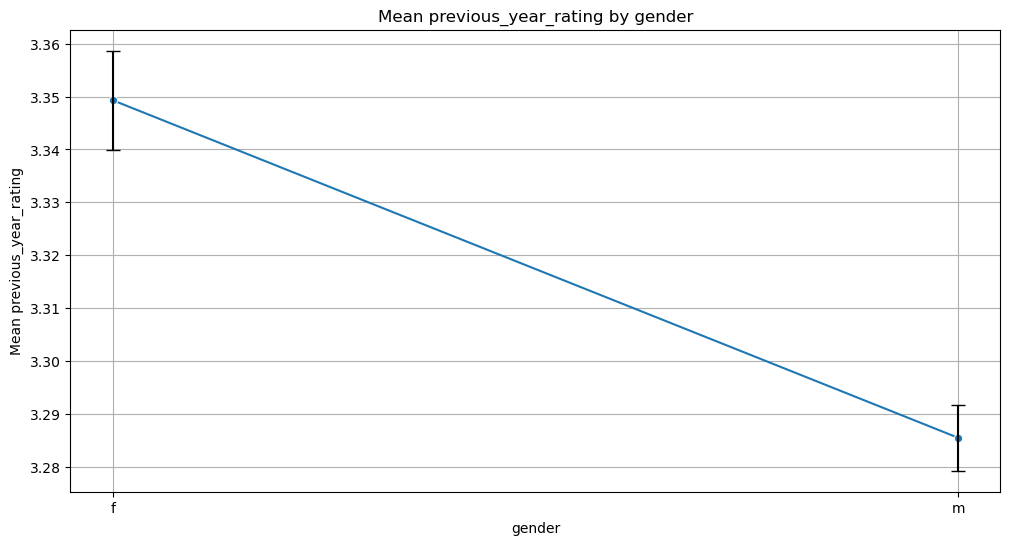

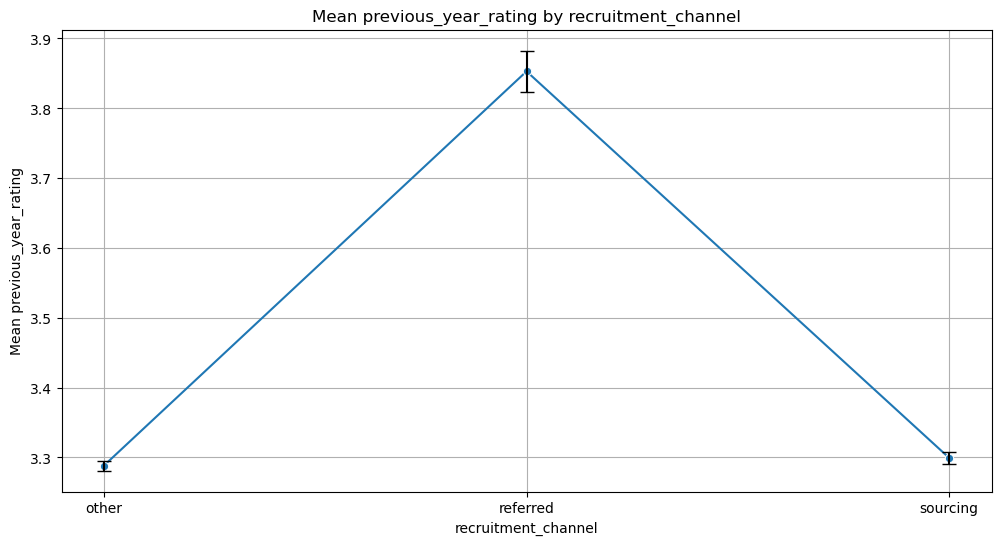

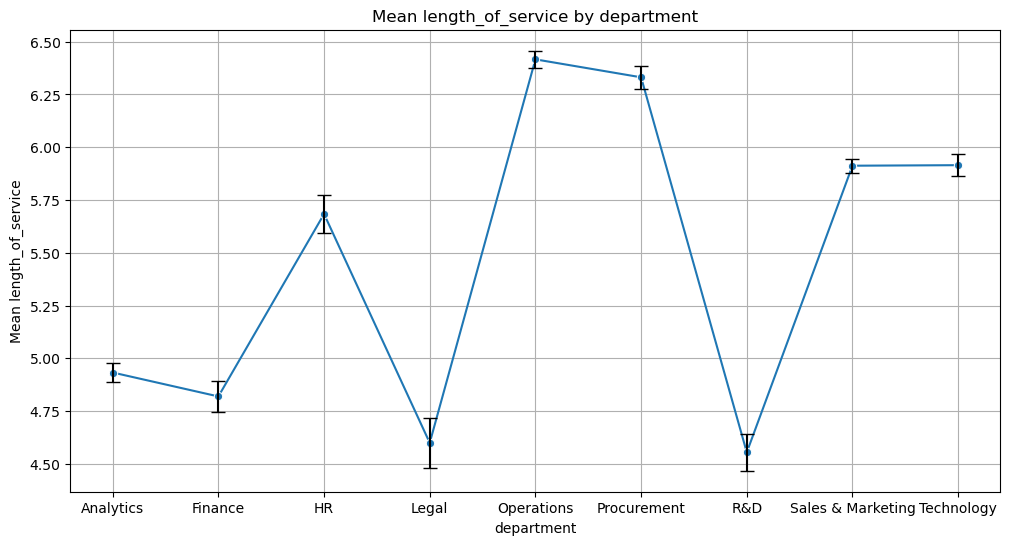

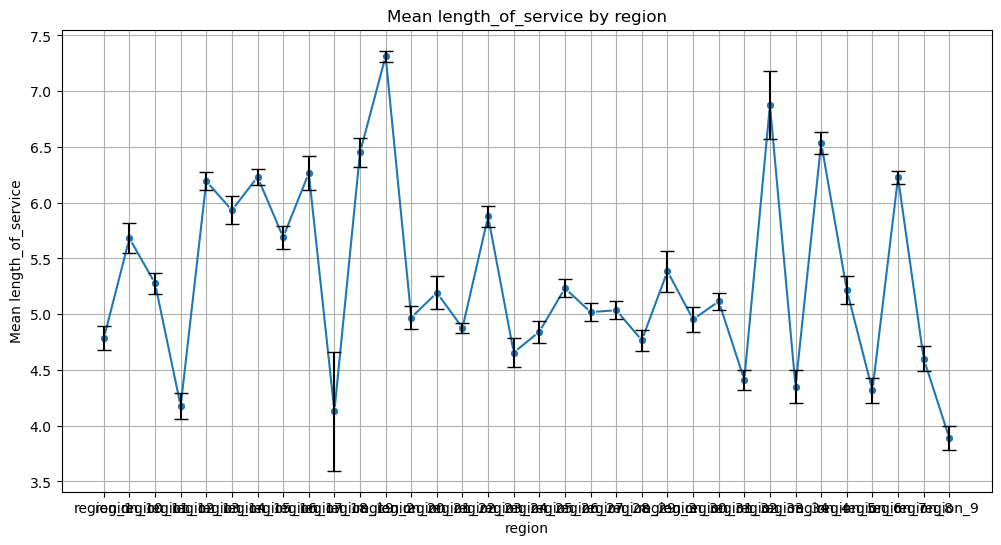

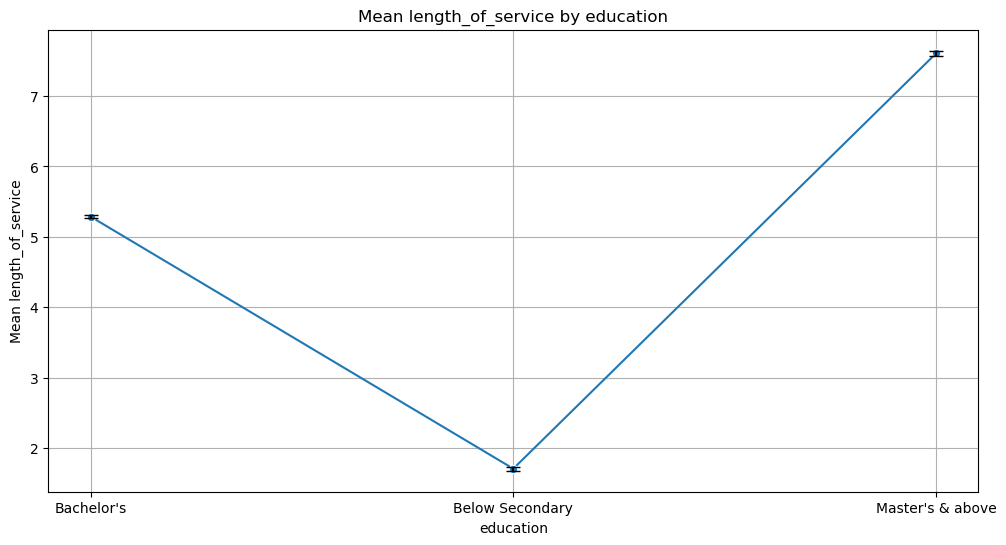

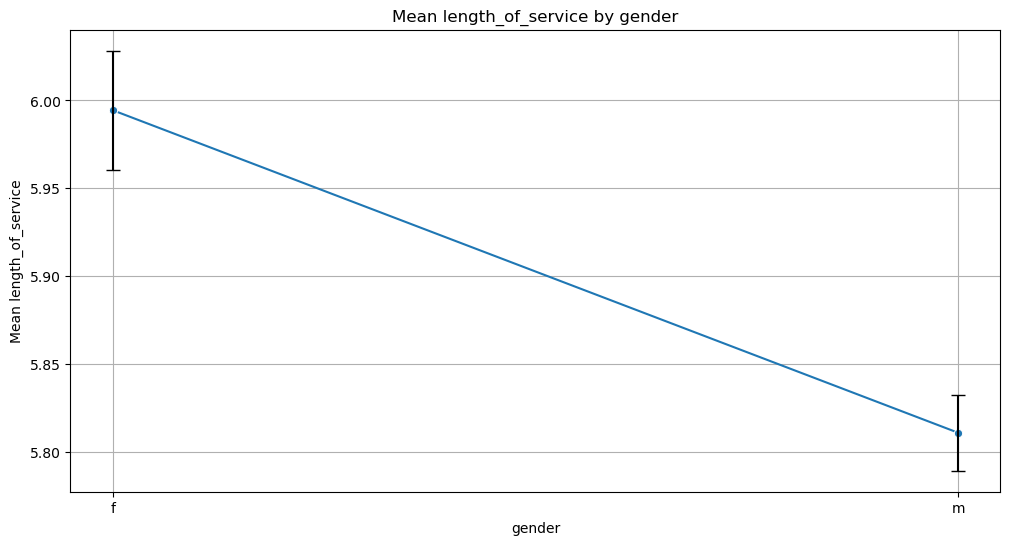

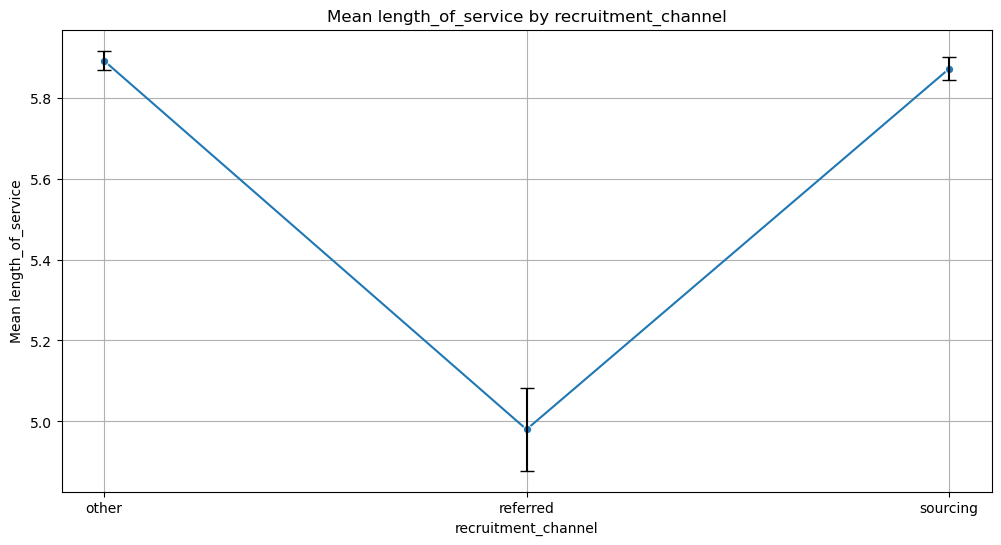

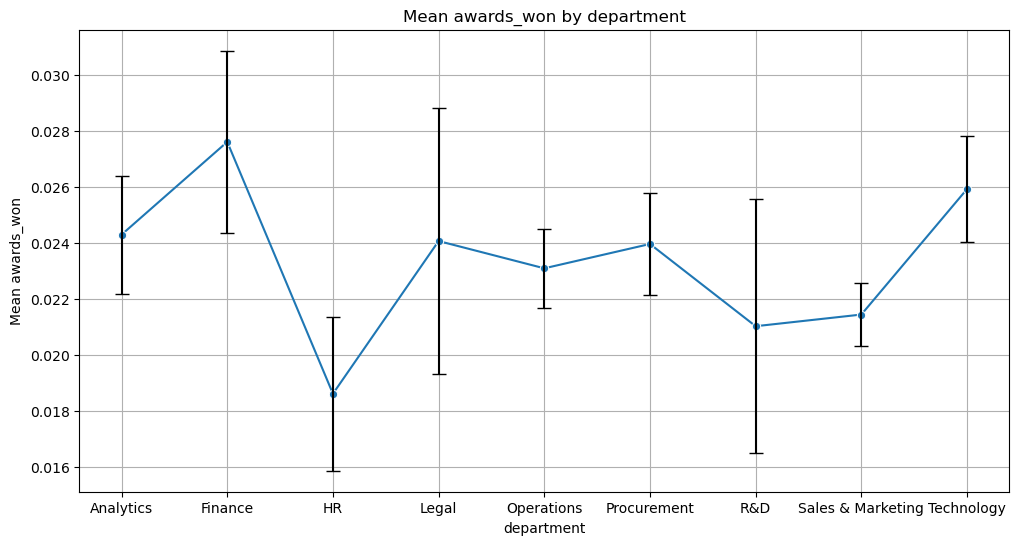

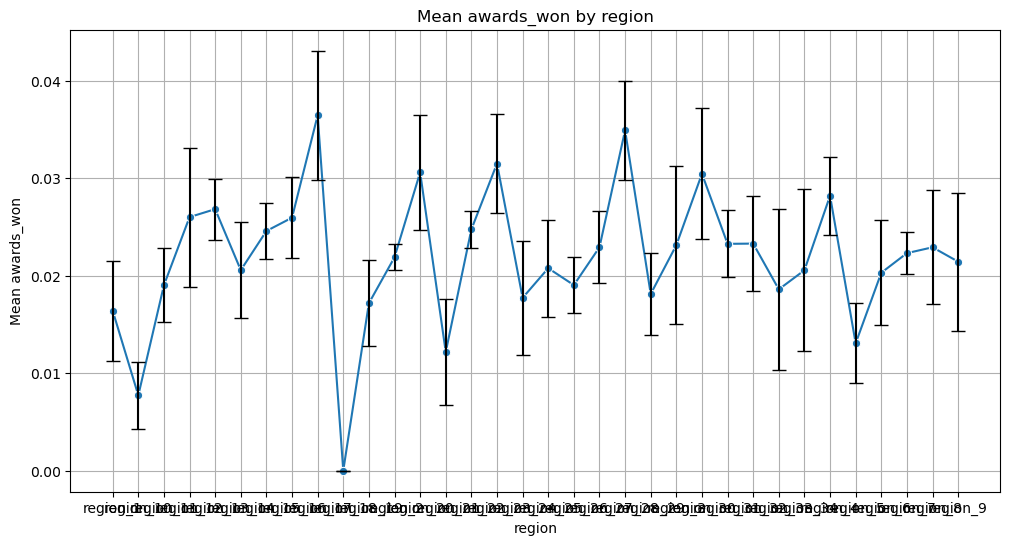

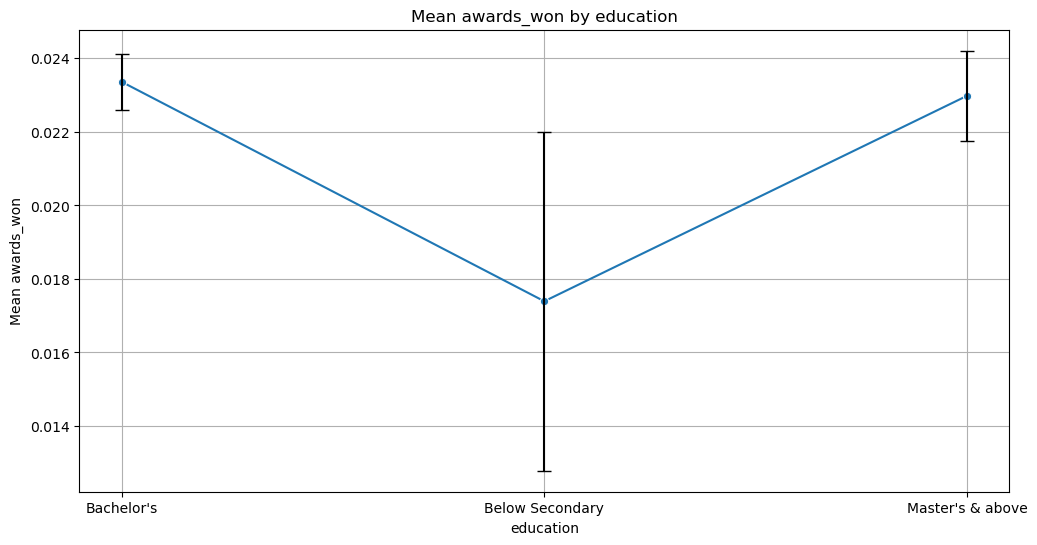

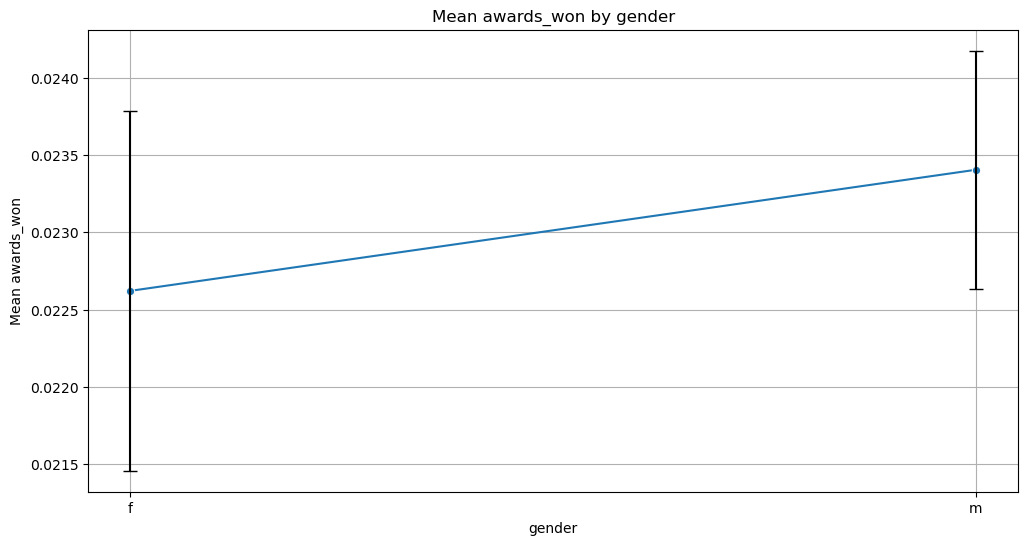

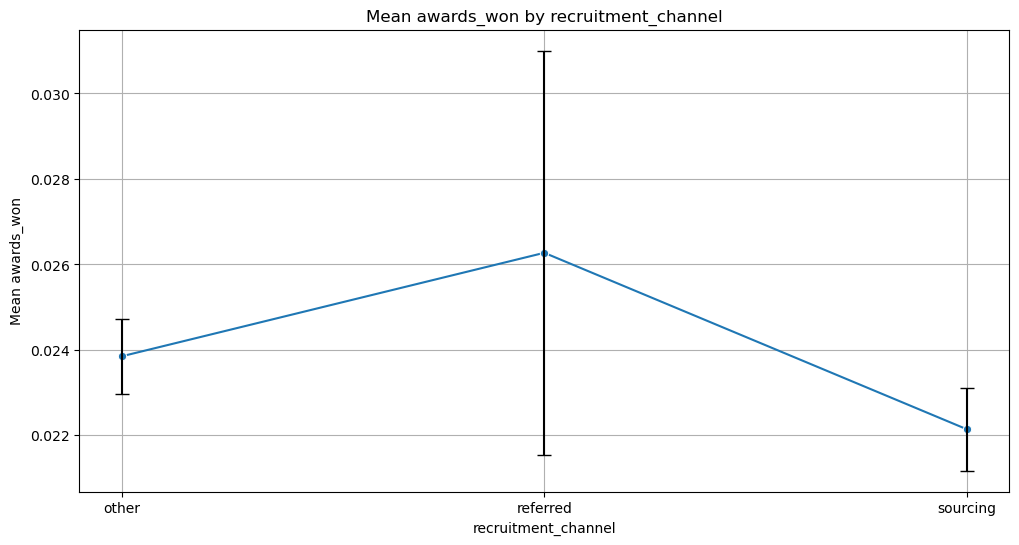

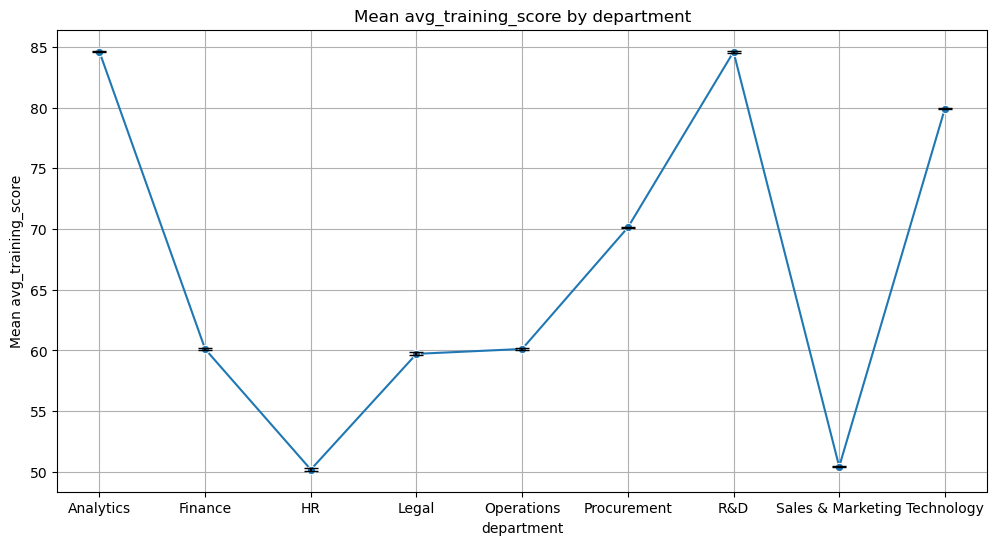

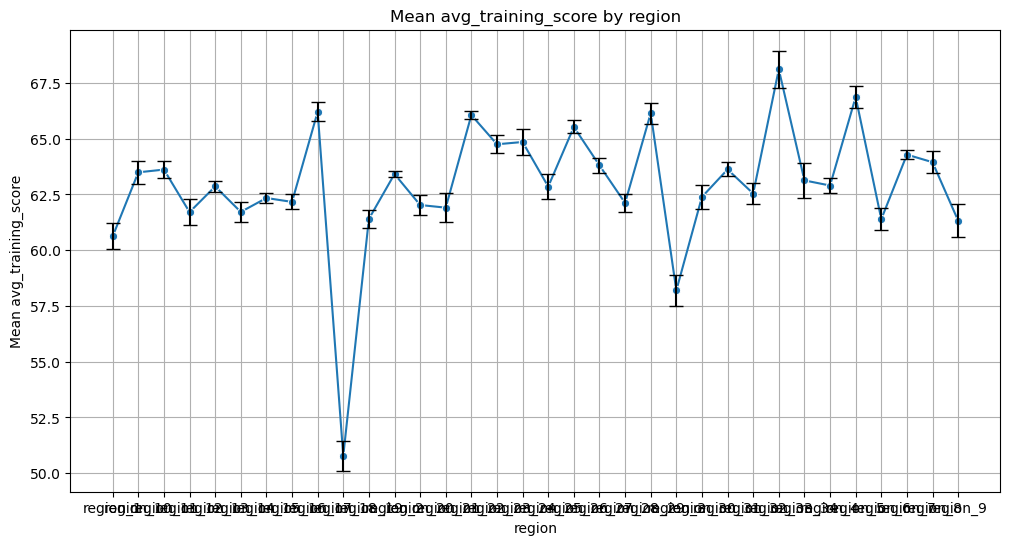

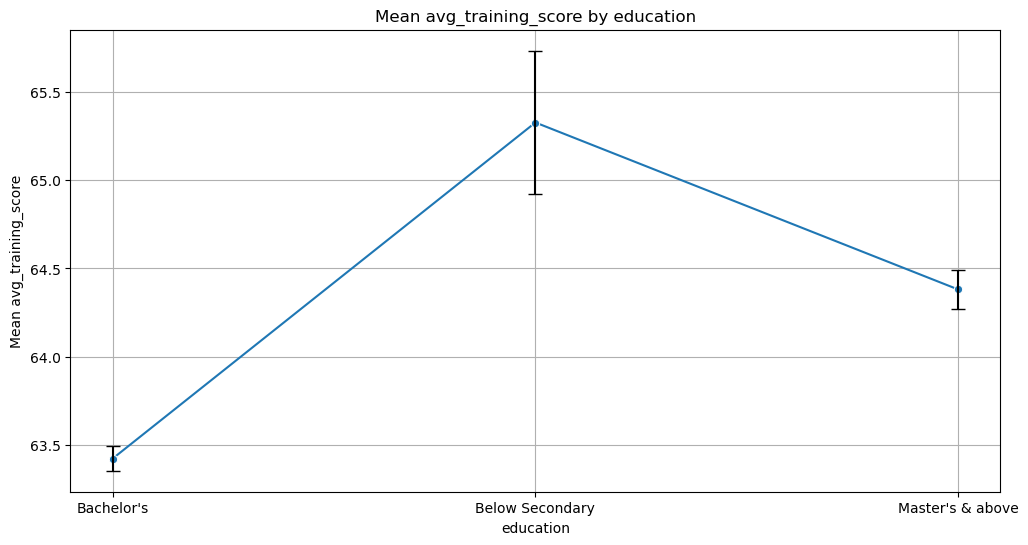

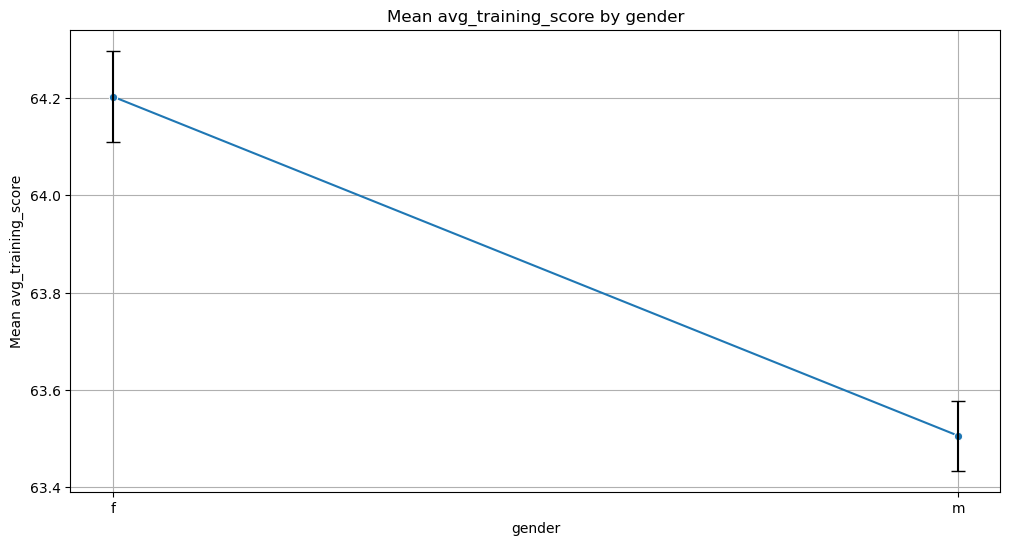

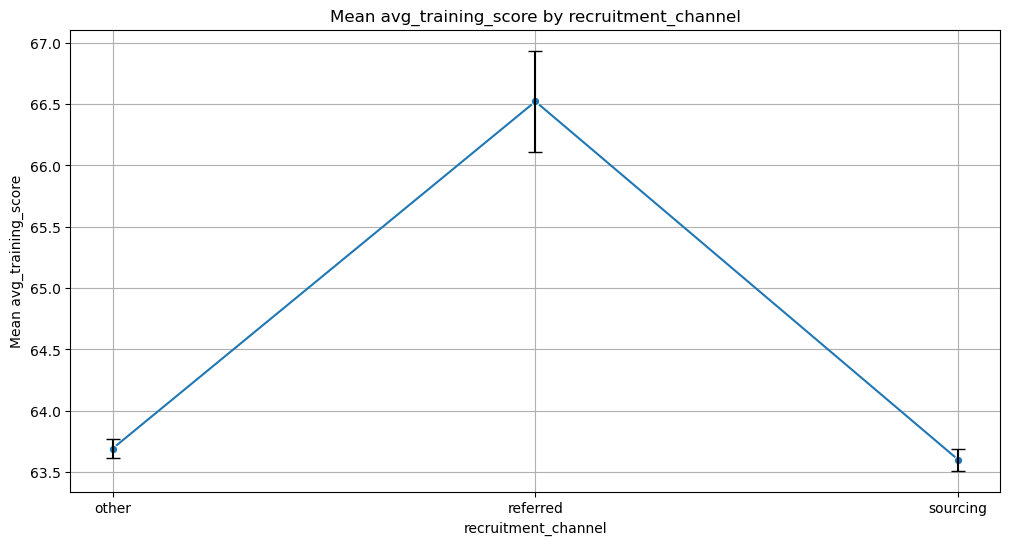

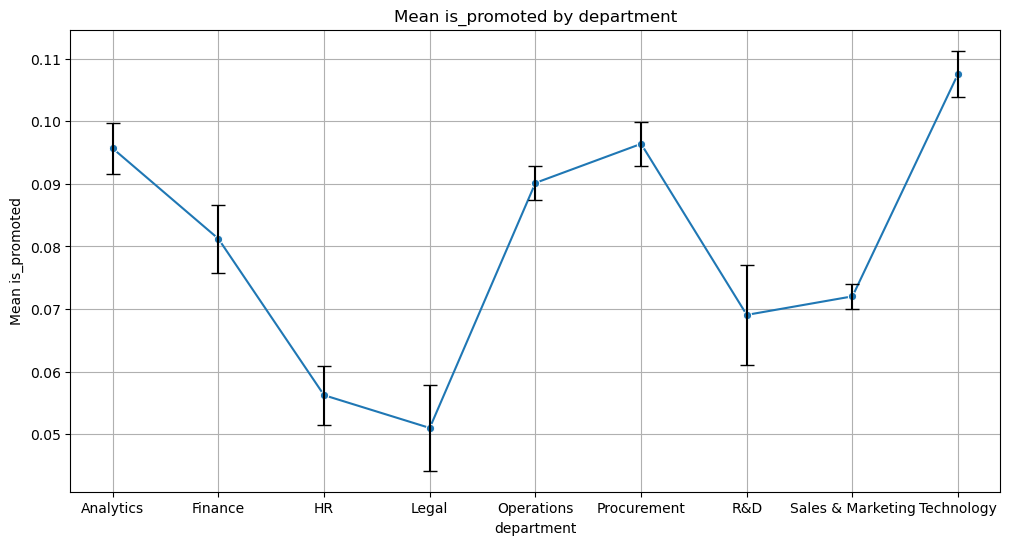

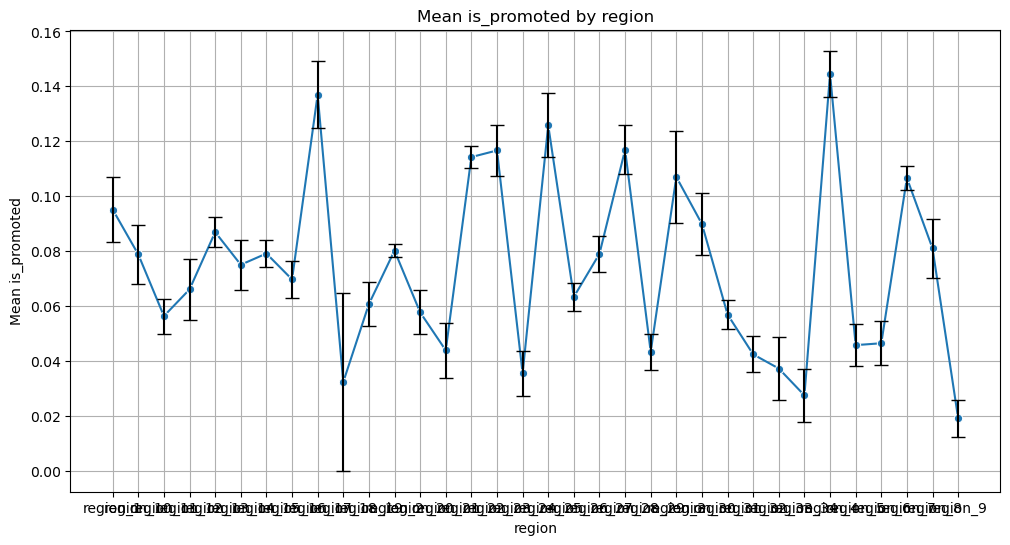

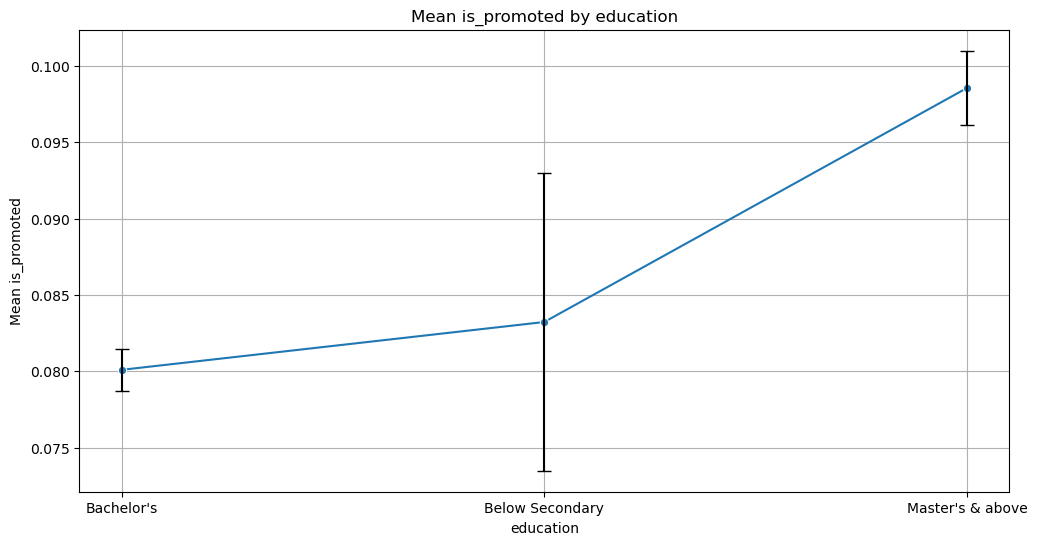

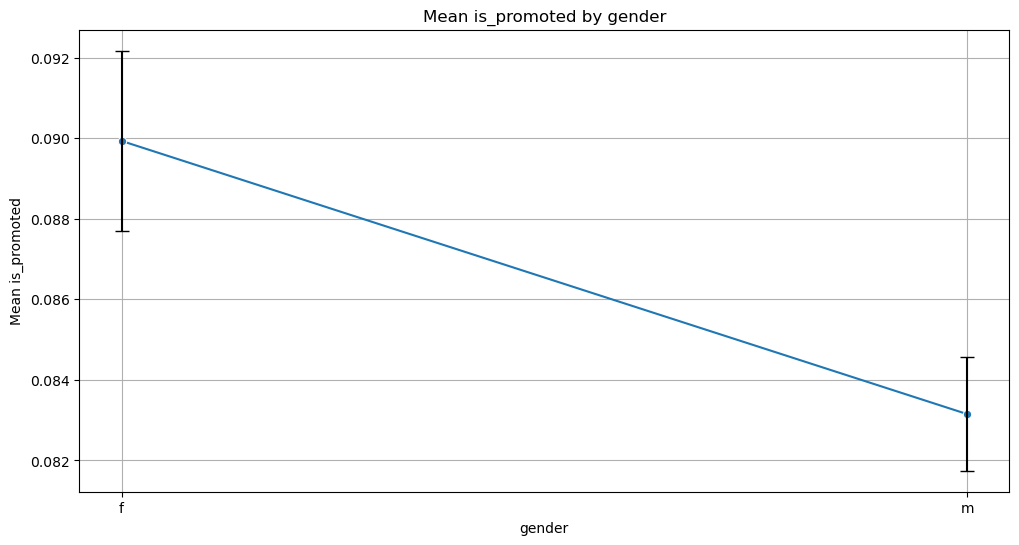

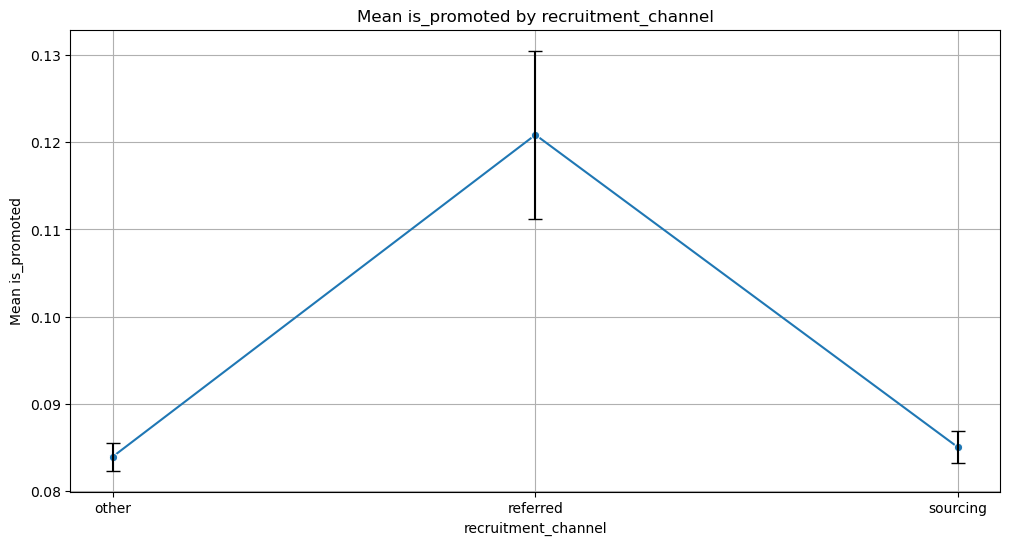

In [38]:
for num_col, cat_col in product(num_cols, cat_cols):
    # Calculate mean and standard deviation for the numerical column based on categorical variable
    summary = data.groupby(cat_col).agg(
        mean_value=(num_col, 'mean'),
        std_value=(num_col, 'std'),
        count=(num_col, 'size')
    ).reset_index()

    # Calculate standard error for error bars
    summary['std_error'] = summary['std_value'] / summary['count']**0.5

    # Plotting line chart with error bars
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=summary, x=cat_col, y='mean_value', marker='o')

    # Add error bars
    plt.errorbar(x=summary[cat_col], 
                 y=summary['mean_value'], 
                 yerr=summary['std_error'], 
                 fmt='none', 
                 c='black', 
                 capsize=5)

    # Adding titles and labels
    plt.title(f'Mean {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(f'Mean {num_col}')
    plt.grid()

    # Show the plot
    plt.show()

## Scroll the above graphs for all possible combos

In [39]:
# Constants
SAMPLE_SIZE_THRESHOLD = 30
SIGNIFICANCE_LEVEL = 0.05

# Assuming you have two lists: cat_cols (categorical) and num_cols (numerical)
# Replace `data` with your actual DataFrame
for cat_col, num_col in product(cat_cols, num_cols):
    # Drop any rows with missing values for the current pair of columns
    filtered_data = data[[cat_col, num_col]].dropna()

    # Group numerical data by the categorical column
    groups = filtered_data.groupby(cat_col)[num_col]

    # Get unique categories
    unique_categories = filtered_data[cat_col].unique()

    # Skip if there's only one category (nothing to compare)
    if len(unique_categories) < 2:
        print(f"Skipping {cat_col} - {num_col}: Less than two categories")
        continue

    # Handle binary categorical columns (T-test)
    if len(unique_categories) == 2:
        group1 = groups.get_group(unique_categories[0])
        group2 = groups.get_group(unique_categories[1])

        # Check which test to perform based on sample size
        if len(group1) > SAMPLE_SIZE_THRESHOLD and len(group2) > SAMPLE_SIZE_THRESHOLD:
            # Perform Z-test approximation using T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "Z-test (T-test approximation)"
        else:
            # Perform T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "T-test"
        
        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    # Handle categorical columns with more than 2 categories (ANOVA)
    else:
        # Create a list of numerical data for each category
        category_data = [group for _, group in groups]

        # Perform one-way ANOVA
        stat, p_value = stats.f_oneway(*category_data)
        test_type = "ANOVA"

        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    print("\n")

ANOVA between department and employee_id:
Statistic: 1.5403, p-value: 0.1374
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between department and no_of_trainings:
Statistic: 113.9264, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and age:
Statistic: 177.9692, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and previous_year_rating:
Statistic: 220.0033, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and length_of_service:
Statistic: 111.2533, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and awards_won:
Statistic: 1.2216, p-value: 0.2814
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between department and avg_training_score:
Statistic: 47567.7274, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between department and is_promoted:
Statistic: 18.9776, p-value: 0.0000
Reject the nul

## Cleaning

<Axes: xlabel='length_of_service'>

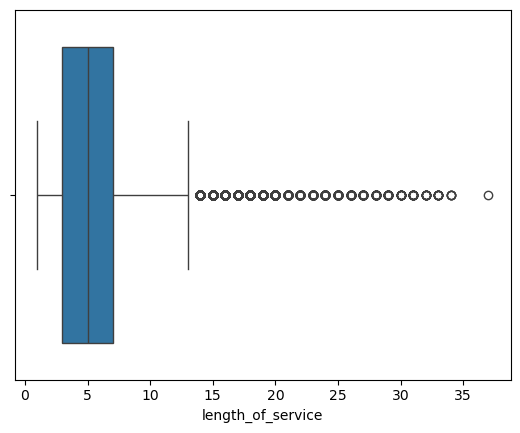

In [40]:
# lets check for outliers
sns.boxplot(data=data,x="length_of_service")

In [41]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['length_of_service'].quantile(0.25)
Q3 = data['length_of_service'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data_filtered = data[(data['length_of_service'] >= lower_bound) & (data['length_of_service'] <= upper_bound)]

# Optionally, print the number of rows before and after
print(f'Original data size: {data.shape[0]}')
print(f'Filtered data size: {data_filtered.shape[0]}')

Original data size: 54808
Filtered data size: 51319


## So we have removed 1028 outliers in the data based on lenght_of_service column

Encoding Categorical Data

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_department = LabelEncoder()
le_region = LabelEncoder()

# Apply Label Encoding to the 'department' column
data['department_encoded'] = le_department.fit_transform(data['department'])

# Apply Label Encoding to the 'region' column
data['region_encoded'] = le_region.fit_transform(data['region'])
# Drop the original categorical columns
data = data.drop(columns=['department', 'region'])
# Display the resulting DataFrame
print(data)

       employee_id         education gender recruitment_channel  \
0            65438  Master's & above      f            sourcing   
1            65141        Bachelor's      m               other   
2             7513        Bachelor's      m            sourcing   
3             2542        Bachelor's      m               other   
4            48945        Bachelor's      m               other   
...            ...               ...    ...                 ...   
54803         3030        Bachelor's      m            sourcing   
54804        74592  Master's & above      f               other   
54805        13918        Bachelor's      m               other   
54806        13614        Bachelor's      m            sourcing   
54807        51526        Bachelor's      m               other   

       no_of_trainings  age  previous_year_rating  length_of_service  \
0                    1   35                   5.0                  8   
1                    1   30                   5.0  

In [43]:
# one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'recruitment_channel'], drop_first=True) 
# This could have also be done using sklearn
# Drop the original categorical columns
data = data.drop(columns=['gender','recruitment_channel'])
# Display the resulting DataFrame
print(data_encoded)

       employee_id         education  no_of_trainings  age  \
0            65438  Master's & above                1   35   
1            65141        Bachelor's                1   30   
2             7513        Bachelor's                1   34   
3             2542        Bachelor's                2   39   
4            48945        Bachelor's                1   45   
...            ...               ...              ...  ...   
54803         3030        Bachelor's                1   48   
54804        74592  Master's & above                1   37   
54805        13918        Bachelor's                1   27   
54806        13614        Bachelor's                1   29   
54807        51526        Bachelor's                1   27   

       previous_year_rating  length_of_service  awards_won  \
0                       5.0                  8           0   
1                       5.0                  4           0   
2                       3.0                  7           0   
3      

In [44]:
data.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

## now our data is ready to be passsed to ML model.
For better results, do proper feature engineering